In [1]:
import time
import numpy as np
from constants import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from build_model import model_tools

X = np.load('Norm_MinMax_%d_X.npy' % window_size)
y = np.load('Norm_MinMax_%d_y.npy' % window_size)

labels = np.unique(y)

le = LabelEncoder()
le.fit(y)
le_y = np.array(le.transform(y))
le_y = le_y.reshape((-1, 1))

ohe = OneHotEncoder()
ohe.fit(le_y)

y = ohe.transform(le_y).toarray()

In [2]:
model = model_tools(X, y, test_size=0.4, model_name='lstm_keras', n_layers=2, dropout=0.5)

Model: "lstm_keras"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_0 (LSTM)                (None, 10, 16)            2112      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                6272      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 8,450
Trainable params: 8,450
Non-trainable params: 0
_________________________________________________________________


lr: 0.0010
Epoch 5/100
321/321 [==============================] - 2s 7ms/step - loss: 0.3876 - accuracy: 0.8193 - auc: 0.9072 - val_loss: 0.3955 - val_accuracy: 0.8465 - val_auc: 0.9221 - lr: 0.0010
Epoch 6/100
321/321 [==============================] - 3s 8ms/step - loss: 0.3770 - accuracy: 0.8193 - auc: 0.9103 - val_loss: 0.4011 - val_accuracy: 0.8372 - val_auc: 0.9199 - lr: 0.0010
Epoch 7/100
321/321 [==============================] - 3s 9ms/step - loss: 0.3159 - accuracy: 0.8816 - auc: 0.9382 - val_loss: 0.3096 - val_accuracy: 0.8698 - val_auc: 0.9491 - lr: 0.0010
Epoch 8/100
321/321 [==============================] - 3s 8ms/step - loss: 0.3224 - accuracy: 0.8629 - auc: 0.9368 - val_loss: 0.3024 - val_accuracy: 0.8698 - val_auc: 0.9510 - lr: 0.0010
Epoch 9/100
321/321 [==============================] - 3s 10ms/step - loss: 0.3426 - accuracy: 0.8629 - auc: 0.9270 - val_loss: 0.3072 - val_accuracy: 0.8837 - val_auc: 0.9655 - lr: 0.0010
Epoch 10/100
321/321 [==========================

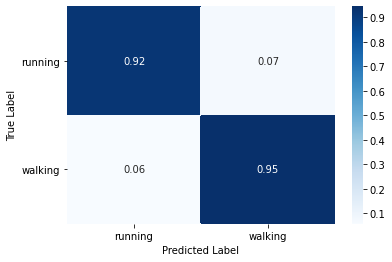

In [3]:
if not os.path.isdir(result_dir):  # For training
    os.mkdir(result_dir)
model.fit_and_save_model(es=False, mc=False, rlr=True, log=True)

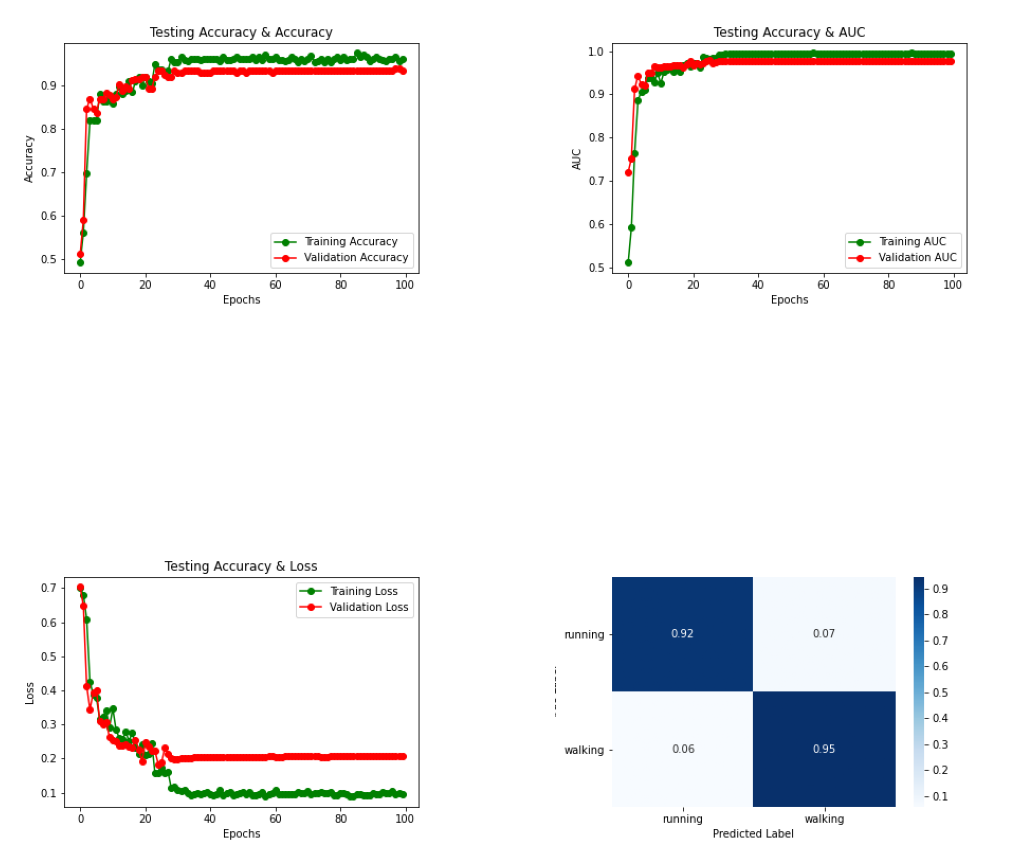

In [4]:
model.plt_fig()